# PLANTILLA PRESELECCIÓN DE VARIABLES

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

C:\Users\acrespod\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\acrespod\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/proyectos/weather_ohio/'

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [12]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [13]:
df.drop(columns={'year_month'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8665 entries, 1998-04-04 to 2021-12-31
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8665 non-null   int64  
 1   month            8665 non-null   int64  
 2   day              8665 non-null   int64  
 3   tmax_mensual_ss  8665 non-null   float64
 4   awnd_1_ss        8665 non-null   float64
 5   awnd_2_ss        8665 non-null   float64
 6   awnd_3_ss        8665 non-null   float64
 7   awnd_4_ss        8665 non-null   float64
 8   awnd_5_ss        8665 non-null   float64
 9   awnd_6_ss        8665 non-null   float64
 10  awnd_7_ss        8665 non-null   float64
 11  prcp_1_ss        8665 non-null   float64
 12  prcp_2_ss        8665 non-null   float64
 13  prcp_3_ss        8665 non-null   float64
 14  prcp_4_ss        8665 non-null   float64
 15  prcp_5_ss        8665 non-null   float64
 16  prcp_6_ss        8665 non-null   float64
 

In [76]:
abs(-3)

3

In [84]:
df.corr()['tmax_1_ss'].apply(lambda x: abs(x)).sort_values(ascending=True).head(30)

prcp_3_ss    0.002794
prcp_2_ss    0.009121
year         0.009165
prcp_4_ss    0.022993
prcp_5_ss    0.032648
prcp_6_ss    0.037695
prcp_7_ss    0.046744
wdf5_7_ss    0.057224
wdf5_6_ss    0.059260
wdf2_7_ss    0.061295
wdf2_6_ss    0.062898
wdf5_5_ss    0.072484
wdf5_4_ss    0.074271
wdf2_5_ss    0.075261
wdf2_4_ss    0.076583
wdf5_1_ss    0.082101
wdf2_1_ss    0.086844
wdf5_3_ss    0.090267
wdf2_3_ss    0.093659
prcp_1_ss    0.094442
wsf5_1_ss    0.113681
wdf5_2_ss    0.141758
wdf2_2_ss    0.150738
wsf2_1_ss    0.155807
wsf5_7_ss    0.172997
wsf5_6_ss    0.181558
wsf5_5_ss    0.200512
day          0.212029
wsf2_7_ss    0.212282
month        0.215760
Name: tmax_1_ss, dtype: float64

In [102]:
x_per.iloc[:,:10].corr()

,tmax_1_ss,tmin_1_ss,day,prcp_1_ss,awnd_1_ss,wsf2_1_ss,wdf2_1_ss,tmax_mm_7_ss,tmax_mm_6_ss,tmax_mensual_ss
tmax_1_ss,1.000000,0.927632,0.212029,0.094442,-0.320971,-0.155807,-0.086844,0.902605,0.909703,0.722713
tmin_1_ss,0.927632,1.000000,0.247619,0.161162,-0.287684,-0.150135,-0.057954,0.894297,0.899640,0.740404
day,0.212029,0.247619,1.000000,-0.002981,-0.169356,-0.169347,-0.054956,0.264348,0.256608,0.584482
prcp_1_ss,0.094442,0.161162,-0.002981,1.000000,0.138121,0.283237,0.018398,0.085737,0.089076,0.037471
awnd_1_ss,-0.320971,-0.287684,-0.169356,0.138121,1.000000,0.811424,0.186920,-0.360413,-0.354998,-0.390307
wsf2_1_ss,-0.155807,-0.150135,-0.169347,0.283237,0.811424,1.000000,0.276150,-0.202888,-0.195812,-0.283044
wdf2_1_ss,-0.086844,-0.057954,-0.054956,0.018398,0.186920,0.276150,1.000000,-0.064192,-0.062457,-0.061029
tmax_mm_7_ss,0.902605,0.894297,0.264348,0.085737,-0.360413,-0.202888,-0.064192,1.000000,0.997011,0.809050
tmax_mm_6_ss,0.909703,0.899640,0.256608,0.089076,-0.354998,-0.195812,-0.062457,0.997011,1.000000,0.799521
tmax_mensual_ss,0.722713,0.740404,0.584482,0.037471,-0.390307,-0.283044,-0.061029,0.809050,0.799521,1.000000


In [91]:
for c in df.columns.tolist():
    valor = round(df.corr()['tmax_1_ss'][c],2)
    if abs(valor) <0.4:
        print(f"{c} : {round(df.corr()['tmax_1_ss'][c],2)}" )

year : 0.01
month : 0.22
day : 0.21
awnd_1_ss : -0.32
awnd_4_ss : -0.39
awnd_5_ss : -0.37
awnd_6_ss : -0.36
awnd_7_ss : -0.35
prcp_1_ss : 0.09
prcp_2_ss : 0.01
prcp_3_ss : -0.0
prcp_4_ss : 0.02
prcp_5_ss : 0.03
prcp_6_ss : 0.04
prcp_7_ss : 0.05
wdf2_1_ss : -0.09
wdf2_2_ss : -0.15
wdf2_3_ss : -0.09
wdf2_4_ss : -0.08
wdf2_5_ss : -0.08
wdf2_6_ss : -0.06
wdf2_7_ss : -0.06
wdf5_1_ss : -0.08
wdf5_2_ss : -0.14
wdf5_3_ss : -0.09
wdf5_4_ss : -0.07
wdf5_5_ss : -0.07
wdf5_6_ss : -0.06
wdf5_7_ss : -0.06
wsf2_1_ss : -0.16
wsf2_2_ss : -0.32
wsf2_3_ss : -0.3
wsf2_4_ss : -0.26
wsf2_5_ss : -0.24
wsf2_6_ss : -0.22
wsf2_7_ss : -0.21
wsf5_1_ss : -0.11
wsf5_2_ss : -0.27
wsf5_3_ss : -0.26
wsf5_4_ss : -0.22
wsf5_5_ss : -0.2
wsf5_6_ss : -0.18
wsf5_7_ss : -0.17


In [66]:
x_per.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8665 entries, 1998-04-04 to 2021-12-31
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tmax_1_ss        8665 non-null   float64
 1   tmin_1_ss        8665 non-null   float64
 2   day              8665 non-null   int64  
 3   prcp_1_ss        8665 non-null   float64
 4   awnd_1_ss        8665 non-null   float64
 5   wsf2_1_ss        8665 non-null   float64
 6   wdf2_1_ss        8665 non-null   float64
 7   tmax_mm_7_ss     8665 non-null   float64
 8   tmax_mm_6_ss     8665 non-null   float64
 9   tmax_mensual_ss  8665 non-null   float64
 10  tmin_2_ss        8665 non-null   float64
 11  wdf5_1_ss        8665 non-null   float64
 12  awnd_2_ss        8665 non-null   float64
 13  tmax_2_ss        8665 non-null   float64
 14  tmin_4_ss        8665 non-null   float64
 15  tmax_5_ss        8665 non-null   float64
 16  tmin_7_ss        8665 non-null   float64
 

## MÉTODOS SUPERVISADOS

### Preparar x e y

In [16]:
target = 'target'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [17]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

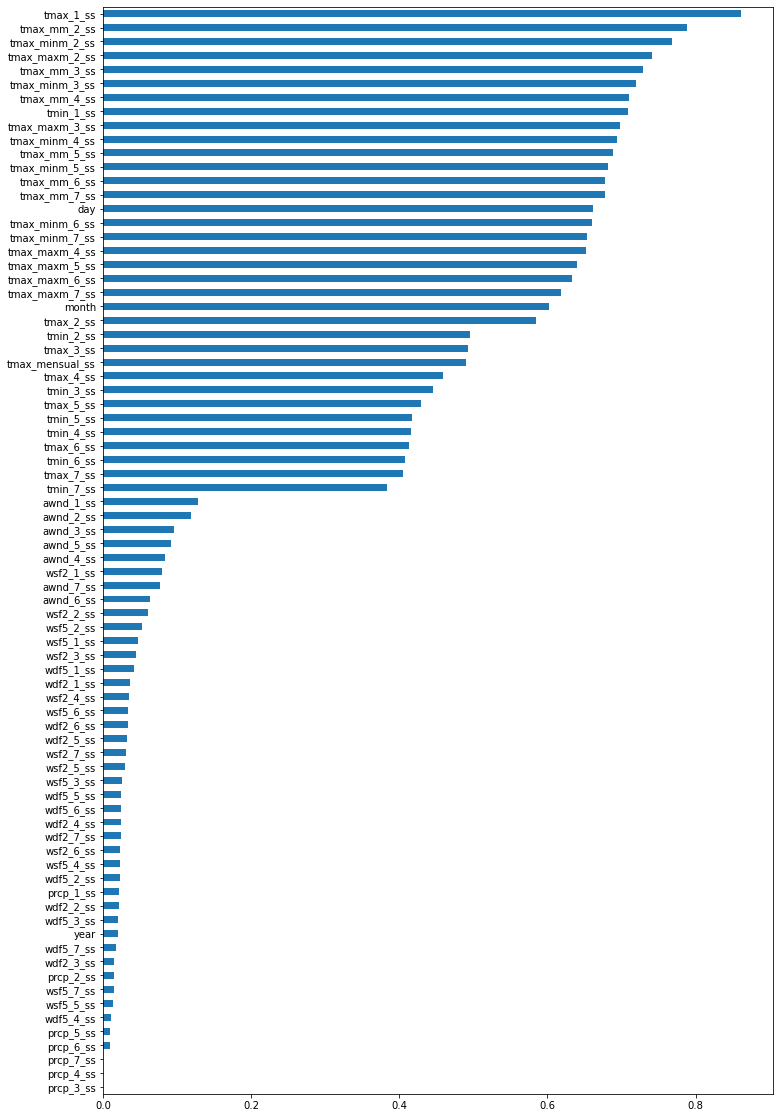

In [18]:
mutual_selector = mutual_info_regression(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

In [ ]:
rank_mi = ranking_mi(mutual_selector)

In [27]:
rank_mi.variable.tolist()

['tmax_1_ss',
 'tmax_mm_2_ss',
 'tmax_minm_2_ss',
 'tmax_maxm_2_ss',
 'tmax_mm_3_ss',
 'tmax_minm_3_ss',
 'tmax_mm_4_ss',
 'tmin_1_ss',
 'tmax_maxm_3_ss',
 'tmax_minm_4_ss',
 'tmax_mm_5_ss',
 'tmax_minm_5_ss',
 'tmax_mm_6_ss',
 'tmax_mm_7_ss',
 'day',
 'tmax_minm_6_ss',
 'tmax_minm_7_ss',
 'tmax_maxm_4_ss',
 'tmax_maxm_5_ss',
 'tmax_maxm_6_ss',
 'tmax_maxm_7_ss',
 'month',
 'tmax_2_ss',
 'tmin_2_ss',
 'tmax_3_ss',
 'tmax_mensual_ss',
 'tmax_4_ss',
 'tmin_3_ss',
 'tmax_5_ss',
 'tmin_5_ss',
 'tmin_4_ss',
 'tmax_6_ss',
 'tmin_6_ss',
 'tmax_7_ss',
 'tmin_7_ss',
 'awnd_1_ss',
 'awnd_2_ss',
 'awnd_3_ss',
 'awnd_5_ss',
 'awnd_4_ss',
 'wsf2_1_ss',
 'awnd_7_ss',
 'awnd_6_ss',
 'wsf2_2_ss',
 'wsf5_2_ss',
 'wsf5_1_ss',
 'wsf2_3_ss',
 'wdf5_1_ss',
 'wdf2_1_ss',
 'wsf2_4_ss',
 'wsf5_6_ss',
 'wdf2_6_ss',
 'wdf2_5_ss',
 'wsf2_7_ss',
 'wsf2_5_ss',
 'wsf5_3_ss',
 'wdf5_5_ss',
 'wdf5_6_ss',
 'wdf2_4_ss',
 'wdf2_7_ss',
 'wsf2_6_ss',
 'wsf5_4_ss',
 'wdf5_2_ss',
 'prcp_1_ss',
 'wdf2_2_ss',
 'wdf5_3_ss',
 '

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [39]:
posicion_variable_limite = 40

##### Extraer los nombres de las que entran

In [40]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [41]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [24]:
rfe = RFE(estimator = XGBRegressor( n_jobs = -1))

#### Entrenar

In [25]:
rfe.fit(x,y)

RFE(estimator=XGBRegressor(base_score=None, booster=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, enable_categorical=False,
                           gamma=None, gpu_id=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_delta_step=None, max_depth=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=-1, num_parallel_tree=None, predictor=None,
                           random_state=None, reg_alpha=None, reg_lambda=None,
                           scale_pos_weight=None, subsample=None,
                           tree_method=None, validate_parameters=None,
                           verbosity=None))

##### Extraer los nombres de las que entran

In [28]:
entran_rfe = x.columns[rfe.support_]

#### Crear el dataframe con la selección

In [29]:
x_rfe = x[entran_rfe].copy()

In [30]:
x_rfe.shape

(8665, 39)

In [32]:
entran_rfe

Index(['day', 'awnd_1_ss', 'awnd_2_ss', 'prcp_1_ss', 'tmin_1_ss', 'tmin_4_ss',
       'tmin_7_ss', 'wdf2_1_ss', 'wdf2_2_ss', 'wdf5_1_ss', 'wdf5_2_ss',
       'wdf5_5_ss', 'wsf2_1_ss', 'wsf2_2_ss', 'wsf5_1_ss', 'wsf5_2_ss',
       'wsf5_6_ss', 'wsf5_7_ss', 'tmax_1_ss', 'tmax_2_ss', 'tmax_4_ss',
       'tmax_5_ss', 'tmax_6_ss', 'tmax_7_ss', 'tmax_maxm_2_ss',
       'tmax_maxm_3_ss', 'tmax_maxm_4_ss', 'tmax_maxm_5_ss', 'tmax_maxm_6_ss',
       'tmax_maxm_7_ss', 'tmax_minm_2_ss', 'tmax_minm_4_ss', 'tmax_minm_5_ss',
       'tmax_minm_7_ss', 'tmax_mm_3_ss', 'tmax_mm_4_ss', 'tmax_mm_5_ss',
       'tmax_mm_6_ss', 'tmax_mm_7_ss'],
      dtype='object')

In [31]:
x_rfe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8665 entries, 1998-04-04 to 2021-12-31
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             8665 non-null   int64  
 1   awnd_1_ss       8665 non-null   float64
 2   awnd_2_ss       8665 non-null   float64
 3   prcp_1_ss       8665 non-null   float64
 4   tmin_1_ss       8665 non-null   float64
 5   tmin_4_ss       8665 non-null   float64
 6   tmin_7_ss       8665 non-null   float64
 7   wdf2_1_ss       8665 non-null   float64
 8   wdf2_2_ss       8665 non-null   float64
 9   wdf5_1_ss       8665 non-null   float64
 10  wdf5_2_ss       8665 non-null   float64
 11  wdf5_5_ss       8665 non-null   float64
 12  wsf2_1_ss       8665 non-null   float64
 13  wsf2_2_ss       8665 non-null   float64
 14  wsf5_1_ss       8665 non-null   float64
 15  wsf5_2_ss       8665 non-null   float64
 16  wsf5_6_ss       8665 non-null   float64
 17  wsf5_7_ss      

### Permutation Importance

#### Crear una función para mostrar el resultado

In [33]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [35]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBRegressor( n_jobs = -1)

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     
                                     n_repeats=5, n_jobs = -1)

C:\Users\acrespod\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### Revisar la salida

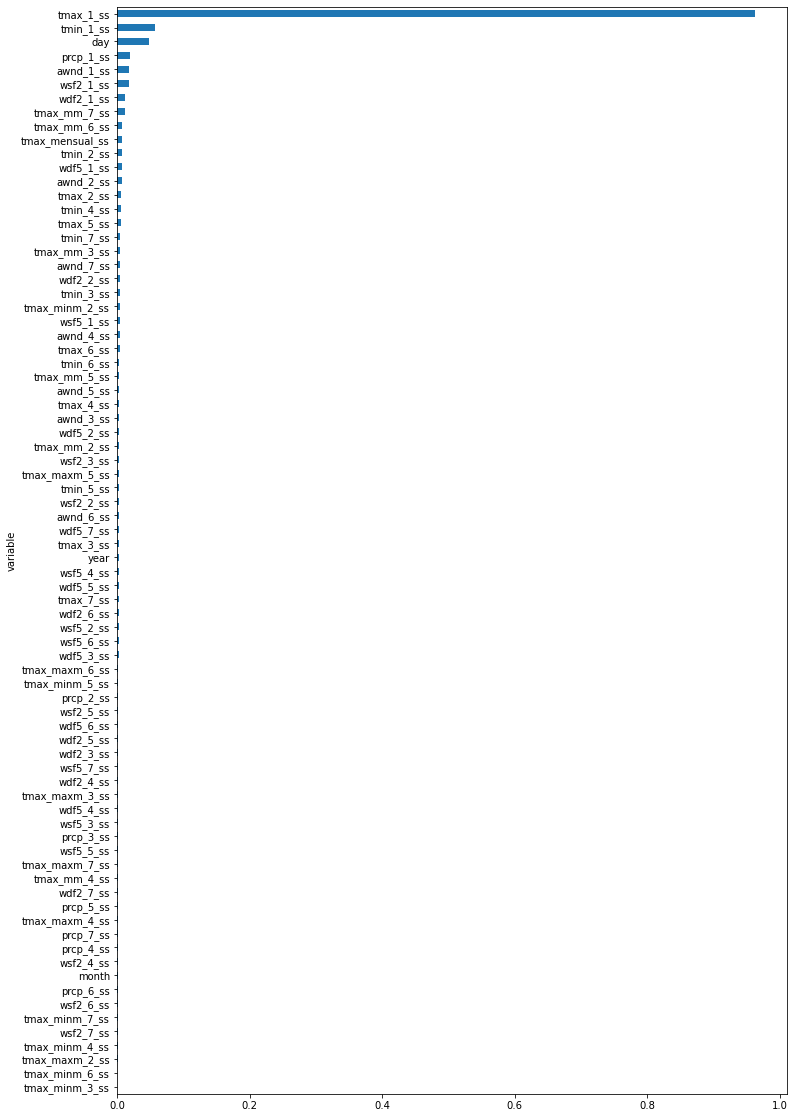

In [36]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,20));

In [38]:
rank_per.head(30)

,variable,importancia_per,ranking_per
53,tmax_1_ss,0.961701,0
18,tmin_1_ss,0.057416,1
2,day,0.048818,2
11,prcp_1_ss,0.019923,3
4,awnd_1_ss,0.018725,4
39,wsf2_1_ss,0.018042,5
25,wdf2_1_ss,0.012808,6
77,tmax_mm_7_ss,0.011858,7
76,tmax_mm_6_ss,0.008198,8
3,tmax_mensual_ss,0.007952,9


#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [103]:
posicion_variable_limite = 10

##### Extraer los nombres de las que entran

In [104]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [105]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [106]:
# x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

In [107]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [134]:
x_preseleccionado2 = x_preseleccionado.copy()
x_preseleccionado2.drop(columns={"tmax_mm_7_ss","tmax_mm_6_ss",'tmin_1_ss','tmax_mensual_ss','awnd_1_ss'},inplace=True)

In [135]:
cor_finales = correlaciones_fuertes(x_preseleccionado2)

##### Revisar agregado

In [132]:
cor_finales.var1.value_counts()

tmax_1_ss    1
Name: var1, dtype: int64

##### Revisar detalle

In [136]:
cor_finales

,var1,var2,corr


In [137]:
x_preseleccionado2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8665 entries, 1998-04-04 to 2021-12-31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tmax_1_ss  8665 non-null   float64
 1   day        8665 non-null   int64  
 2   prcp_1_ss  8665 non-null   float64
 3   wsf2_1_ss  8665 non-null   float64
 4   wdf2_1_ss  8665 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 406.2 KB


In [138]:
x_preseleccionado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8665 entries, 1998-04-04 to 2021-12-31
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tmax_1_ss        8665 non-null   float64
 1   tmin_1_ss        8665 non-null   float64
 2   day              8665 non-null   int64  
 3   prcp_1_ss        8665 non-null   float64
 4   awnd_1_ss        8665 non-null   float64
 5   wsf2_1_ss        8665 non-null   float64
 6   wdf2_1_ss        8665 non-null   float64
 7   tmax_mm_7_ss     8665 non-null   float64
 8   tmax_mm_6_ss     8665 non-null   float64
 9   tmax_mensual_ss  8665 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 744.6 KB


#### Filtrar variables

Meter en una lista las que queramos descartar por alta correlacion y eliminarlas.

In [32]:
# a_eliminar_corr = ['euribor3m_qt', 'euribor3m_yeo_rs']

In [33]:
# x_preseleccionado.drop(columns = a_eliminar_corr, inplace = True)

In [139]:

# x_preseleccionado.columns.to_list()

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [149]:
#Definir los nombres de los archivos
nombre_x_preseleccionado2 = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado2.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [152]:
#Guardar los archivos
x_preseleccionado2.to_pickle(nombre_x_preseleccionado2)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [151]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales2.pickle'

x_preseleccionado2.iloc[0].to_pickle(nombre_variables_finales)